Shape of the batch of signals: (50, 320)
[[ 0.02610602-0.04141535j -0.04426338+0.07082257j  0.03041649+0.01019726j
  ...  0.12306433-0.09640199j  0.06354567-0.15357933j
   0.13155567+0.30335782j]
 [ 0.06092093+0.02018903j  0.00317079+0.05825378j  0.03670693-0.00878348j
  ...  0.09570795-0.09473646j -0.02317187+0.14507969j
   0.00276925-0.1568414j ]
 [ 0.05088671+0.05554036j -0.02327913+0.07328019j -0.0427894 +0.02040883j
  ...  0.18084888+0.0833344j   0.04368847+0.12271291j
   0.31206142+0.09341132j]
 ...
 [ 0.03415615-0.00399863j -0.0179872 +0.01343637j  0.0423624 -0.04010339j
  ... -0.01910154+0.00949313j -0.01047426+0.05726662j
   0.03396104-0.04069042j]
 [ 0.02098404+0.06910165j -0.03266839-0.05163831j  0.01924762+0.11835347j
  ...  0.06738431-0.02096554j  0.00468968-0.06784299j
   0.03146622-0.00737493j]
 [ 0.04795987-0.02178052j -0.02746665+0.07240706j  0.03537934+0.0478537j
  ... -0.12629589+0.08437463j  0.08744987-0.09376171j
  -0.02066767+0.11739896j]]


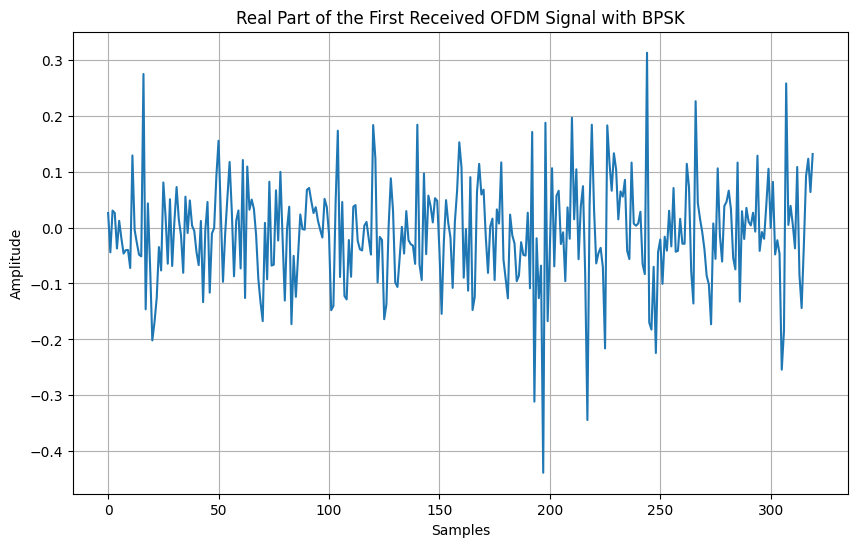

In [2]:
import numpy as np
import matplotlib.pyplot as plt


BW = 256e3  
N = 64      
Fs = 16e3   
samples = 4  
SNR_dB = 10  
num_signals = 50 
def bpsk_ofdm_batch(num_signals, N, samples, SNR_dB):
    batch_of_signals = np.zeros((num_signals, N * samples + int(N * samples / 4)), dtype=complex)

    for i in range(num_signals):
        bits = np.random.randint(0, 2, N)        
        bpsk_sym = []
        for bit in bits:
            if bit == 0:
                bpsk_sym.append(-1)
            else:
                bpsk_sym.append(1)
        
        bpsk_sym = np.array(bpsk_sym)  
        
        
        ofdm_sym = np.fft.ifft(bpsk_sym, n=N)
        ofdm_symbol_upsampled = np.repeat(ofdm_sym, samples)    
        cyclic_prefix_length = int(N * samples / 4)
        cyclic_prefix = ofdm_symbol_upsampled[-cyclic_prefix_length:]

        transmitted_signal_bpsk = np.concatenate((cyclic_prefix, ofdm_symbol_upsampled))

        
        fading_coefficients = (np.random.normal(0, 1, transmitted_signal_bpsk.shape) +
                               1j * np.random.normal(0, 1, transmitted_signal_bpsk.shape)) / np.sqrt(2)
        faded_signal_bpsk = transmitted_signal_bpsk * fading_coefficients

        signal_power = np.mean(np.abs(transmitted_signal_bpsk) ** 2)
        SNR_linear = 10 ** (SNR_dB / 10)
        noise_power = signal_power / SNR_linear
        noise = np.sqrt(noise_power) * (np.random.normal(0, 1, faded_signal_bpsk.shape) +
                                        1j * np.random.normal(0, 1, faded_signal_bpsk.shape))
        received_signal = faded_signal_bpsk + noise
        batch_of_signals[i] = received_signal

    return batch_of_signals

batch_of_signals = bpsk_ofdm_batch(num_signals, N, samples, SNR_dB)

print("Shape of the batch of signals:", batch_of_signals.shape)
print(batch_of_signals)
plt.figure(figsize=(10, 6))
plt.plot(np.real(batch_of_signals[0]))
plt.title('Real Part of the First Received OFDM Signal with BPSK')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

[ 0.+1.j  0.+1.j  0.+1.j  1.+0.j  0.+1.j -1.+0.j  0.-1.j  0.-1.j  0.+1.j
  0.-1.j  0.-1.j  1.+0.j  0.+1.j -1.+0.j -1.+0.j  0.+1.j  0.-1.j  0.+1.j
  1.+0.j -1.+0.j  0.+1.j  1.+0.j  0.+1.j  0.-1.j  0.-1.j -1.+0.j  0.+1.j
  0.+1.j  1.+0.j -1.+0.j  0.-1.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j
  1.+0.j -1.+0.j -1.+0.j  0.-1.j -1.+0.j  1.+0.j  1.+0.j  0.+1.j -1.+0.j
  0.-1.j  1.+0.j  0.-1.j  0.-1.j  0.-1.j  0.+1.j  1.+0.j  0.-1.j  1.+0.j
  0.-1.j  0.+1.j -1.+0.j  1.+0.j -1.+0.j  0.+1.j  0.-1.j  0.-1.j -1.+0.j
  0.+1.j]
[ 1.+0.j  0.+1.j  0.+1.j  1.+0.j -1.+0.j  0.-1.j  0.-1.j  0.-1.j  0.-1.j
 -1.+0.j  0.+1.j  1.+0.j  0.-1.j  0.+1.j -1.+0.j  0.+1.j -1.+0.j  0.+1.j
  1.+0.j  0.+1.j  1.+0.j  0.-1.j -1.+0.j  0.-1.j  1.+0.j  0.+1.j  0.+1.j
  0.-1.j  1.+0.j  0.+1.j -1.+0.j  0.-1.j  0.-1.j  1.+0.j  1.+0.j  1.+0.j
  1.+0.j  0.-1.j  0.-1.j  1.+0.j  0.+1.j -1.+0.j  0.-1.j  0.+1.j  0.+1.j
  1.+0.j -1.+0.j -1.+0.j  0.+1.j  0.+1.j  1.+0.j  0.+1.j -1.+0.j  1.+0.j
  1.+0.j  0.+1.j  1.+0.j  1.+0.j  0.-1.j 

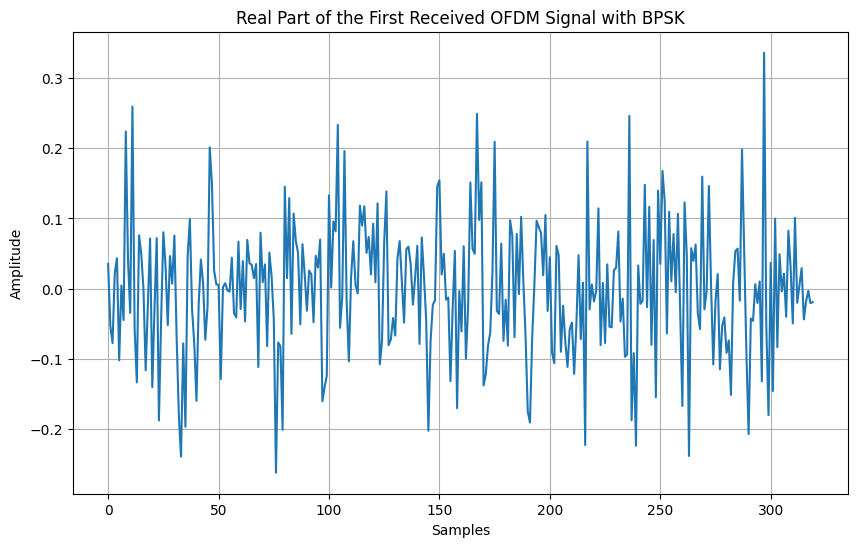

In [ ]:
 

def qpsk_ofdm_batch(num_signals, N, samples, SNR_dB):
    batch_of_signals = np.zeros((num_signals, N * samples + int(N * samples / 4)), dtype=complex)

    for i in range(num_signals):
        qpsk_sym = []
        bits = np.random.randint(0, 2,N*2)
        for j in range(0,len(bits),2):
            if i+1 < len(bits):
                if(bits[j]==0 and bits[j+1]==0):
                    qpsk_sym.append(1+0j)
                elif(bits[j]==0 and bits[j+1]==1):
                    qpsk_sym.append(0+1j)
                elif(bits[j]==1 and bits[j+1]==0):
                    qpsk_sym.append(-1+0j)
                else:
                    qpsk_sym.append(0-1j)

        qpsk_sym = np.array(qpsk_sym)
        ofdm_symbol = np.fft.ifft(qpsk_sym, n=N)
        ofdm_symbol_upsampled = np.repeat(ofdm_symbol, samples)
        cyclic_prefix_length = int((N * samples) / 4)  
        cyclic_prefix = ofdm_symbol_upsampled[-cyclic_prefix_length:]
        transmitted_signal_qpsk = np.concatenate((cyclic_prefix, ofdm_symbol_upsampled))


        
        fading_coefficients = (np.random.normal(0, 1, transmitted_signal_qpsk.shape) +
                               1j * np.random.normal(0, 1, transmitted_signal_qpsk.shape)) / np.sqrt(2)
        faded_signal_qpsk = transmitted_signal_qpsk * fading_coefficients

        signal_power = np.mean(np.abs(faded_signal_qpsk) ** 2)
        SNR_linear = 10 ** (SNR_dB / 10)
        noise_power = signal_power / SNR_linear

        noise = np.sqrt(noise_power) * (np.random.normal(0, 1, faded_signal_qpsk.shape) +
                                        1j * np.random.normal(0, 1, faded_signal_qpsk.shape))
        received_signal_qpsk = faded_signal_qpsk + noise

        batch_of_signals[i] = received_signal_qpsk

    return batch_of_signals

batch_of_signals = qpsk_ofdm_batch(num_signals, N, samples, SNR_dB)

print("Shape of the batch of signals:", batch_of_signals.shape)
print(batch_of_signals)
plt.figure(figsize=(10, 6))
plt.plot(np.real(batch_of_signals[0]))
plt.title('Real Part of the First Received OFDM Signal with BPSK')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.model= nn.Sequential(
            nn.Conv2d(2,16,3,1,1),    #(100,16,1,320)
            nn.BatchNorm2d(16),
            nn.ReLU(),

            nn.Conv2d(16,32,3,1,1),  #(100,32,1,320)
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(1, 2)),   #(100,32,1,160)

            nn.Conv2d(32,64,3,1,1), #(100,64,1,160)
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=(1, 2)),  #(100,64,1,80)

            nn.Flatten(),
            nn.Linear(64*1*80,128),  # (feature * height * width)
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128,2)
        )

    def forward(self, x):
        return self.model(x)

classifier = SimpleCNN()
optimizer = optim.Adam(classifier.parameters(), lr=0.00001, betas=(0.5, 0.999),weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()

In [5]:

num_epoch = 100
num_batches = 100
for epoch in range(num_epoch):
    for batch in range(num_batches):
        bpsk_signals = bpsk_ofdm_batch(num_signals, N, samples, SNR_dB)
        qpsk_signals = qpsk_ofdm_batch(num_signals, N, samples, SNR_dB)
        bpsk_label = np.zeros(50)
        qpsk_label = np.ones(50)
        batch_signals = np.concatenate((bpsk_signals,qpsk_signals), axis = 0)
        batch_label = np.concatenate((bpsk_label,qpsk_label), axis = 0)
        
        indices = np.random.permutation(len(batch_signals))
        shuffled_signal = batch_signals[indices]
        shuffled_label = batch_label[indices]

        real_part = np.real(shuffled_signal)
        image_part = np.imag(shuffled_signal)

        signal_channel = np.stack((real_part, image_part), axis=1)
        signal_tensor = torch.tensor(signal_channel, dtype=torch.float32).unsqueeze(2)  # Shape: (100, 2, 1, 320)
        label_tensor = torch.tensor(shuffled_label, dtype=torch.long)

        optimizer.zero_grad()
        output = classifier(signal_tensor)
        loss = criterion(output,label_tensor)
        loss.backward()    
        torch.nn.utils.clip_grad_norm_(classifier.parameters(), max_norm=1.0)
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epoch}] | Loss: {loss.item():.4f}')




Epoch [1/100] | Loss: 0.6853


KeyboardInterrupt: 